# HMEQ LOAN DEFAULT PREDICTION

## *_STATISTICAL AND VISUALIZATION LIBRARIES_*

In [226]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

#### **Import, visualize, and basic infomation of Loan data set**

In [265]:
df = pd.read_csv("hmeq_Loan_Default.csv").copy()
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [266]:
df.shape

(5960, 13)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [268]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

* Lots of missing values, espicailly 1/5 of DEBTINC data is made up of null values (how was this data gotten), there is need make sense of the data in each column.
* YOJ in wrong data type should be int
* CLAGE in wring data type should be int

#### **Descriptive statistics of data set**

In [269]:
# Split data set to Categorical and Numerical dtypes
df_cat= df.select_dtypes(object)
df_cat.describe()

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


In [ ]:
df_num= df.select_dtypes([int, float])
df_num.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


## *_Exploratory Data Analysis of Loan Data set_*

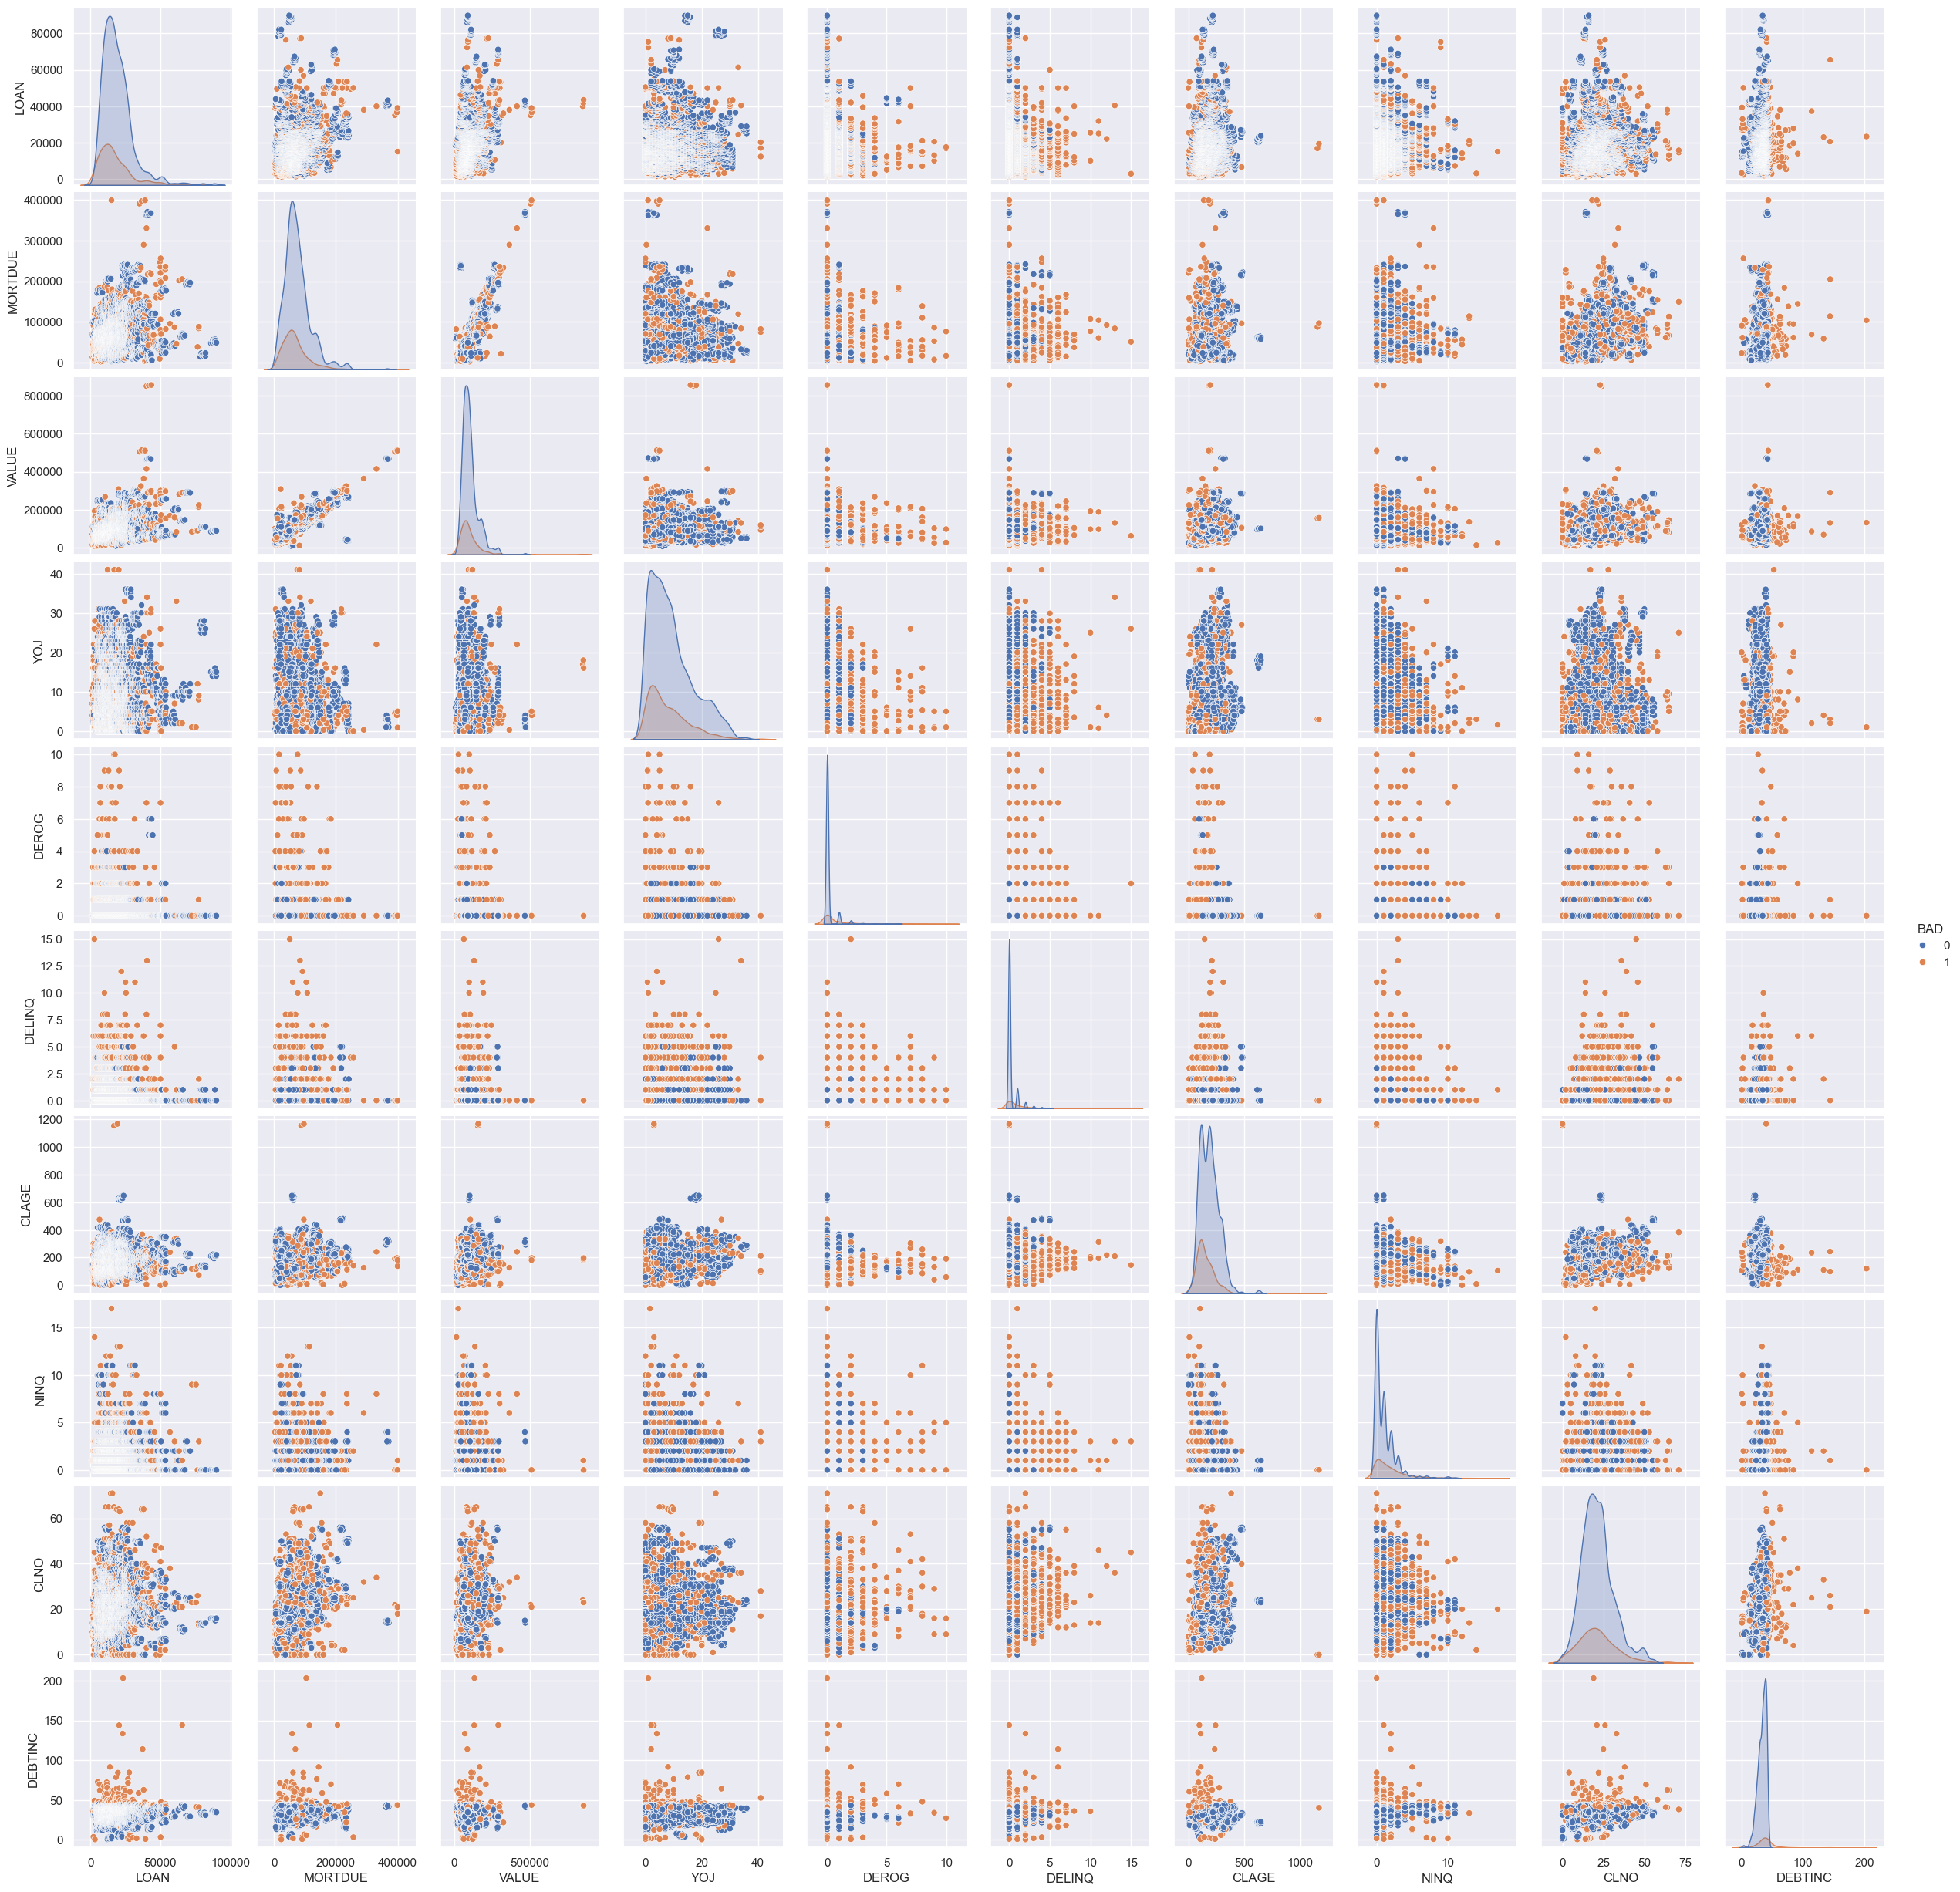

In [ ]:
# gplot = sns.PairGrid(df)
# gplot.map(sns.scatterplot)

# pairplot= sns.pairplot(df, hue="BAD")

* Data is Skewed to the left
* Outliers abound in the data sets
* Are Columns have +vely linear correlations for the two classes in BAD (eg. VALUE/MORTDUE, LOAN/VALUE ), while other are correlated for one out out of the classes (eg. DEBTINC/CNO)

<Axes: xlabel='JOB', ylabel='count'>

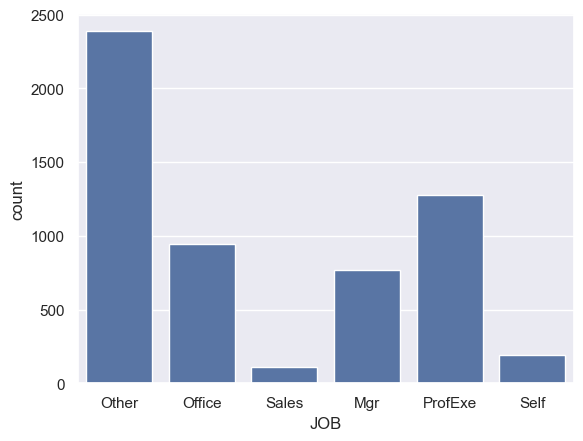

In [109]:
sns.countplot(df, x="JOB")

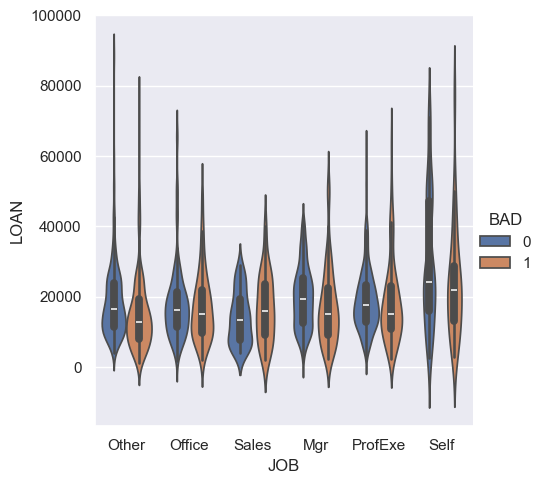

In [110]:
job_loan= sns.catplot(df, x="JOB", y="LOAN", kind="violin", hue="BAD")
# job_loan_fig = job_loan.get_figure()
job_loan.savefig("./plots/job_loan.png")

<Axes: xlabel='REASON', ylabel='count'>

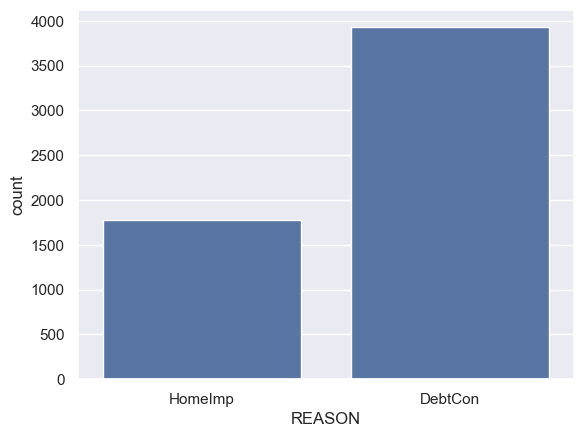

In [111]:
sns.countplot(df, x="REASON")

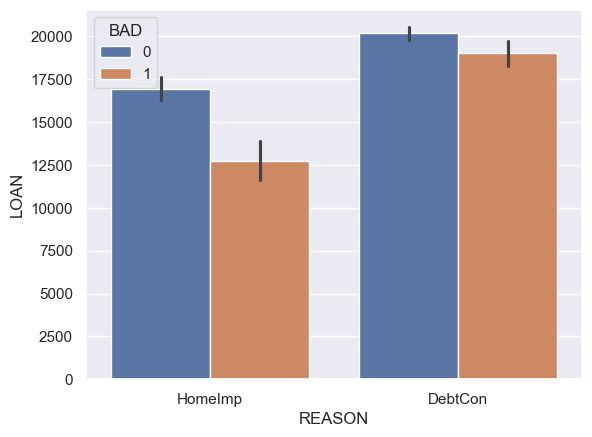

In [10]:
bad_loan= sns.barplot(df, x="REASON", y="LOAN", hue="BAD", legend=True)
bad_loan_fig = bad_loan.get_figure()
bad_loan_fig.savefig("./plots/bad_loan.png")

In [11]:
# split data by BAD column
default= df[df.BAD == 1]
non_default= df[df.BAD == 0]

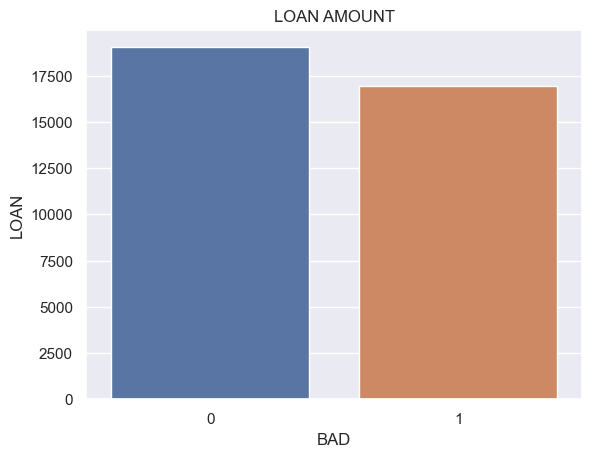

In [12]:
loan_amount= sns.barplot(df, y="LOAN", x="BAD", hue="BAD", errorbar=None, legend=False)
plt.title("LOAN AMOUNT")
loan_fig = loan_amount.get_figure()
loan_fig.savefig("./plots/loan_amount.png")

In [13]:
# sns.scatterplot(default, x="CLAGE", y="YOJ", hue="JOB")

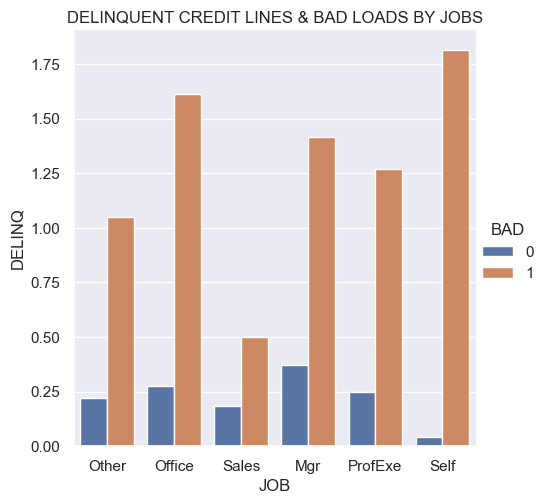

In [14]:
job_delinq= sns.catplot(df, x="JOB", y="DELINQ", kind="bar", hue="BAD", errorbar=None)
# job_delinq_fig = job_loan.get_figure()
plt.title("DELINQUENT CREDIT LINES & BAD LOADS BY JOBS")
job_delinq.savefig("./plots/job_delinq.png")

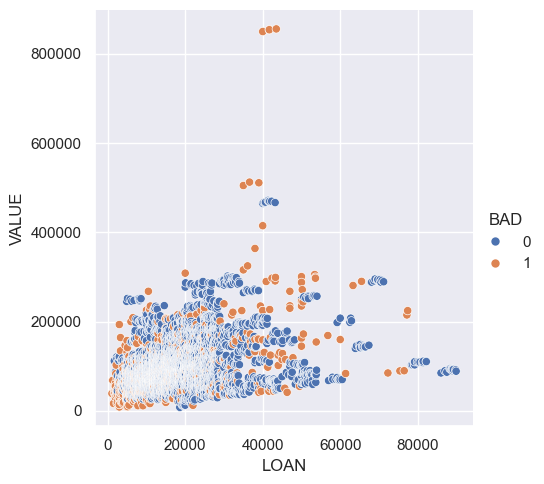

In [15]:
pos_cor_loan_value= sns.relplot(df, x="LOAN", y="VALUE", hue="BAD")
# pos_cor_loan_value_fig = pos_cor_loan_value.get_figure()
pos_cor_loan_value.savefig("./plots/relation_loan_value.png")

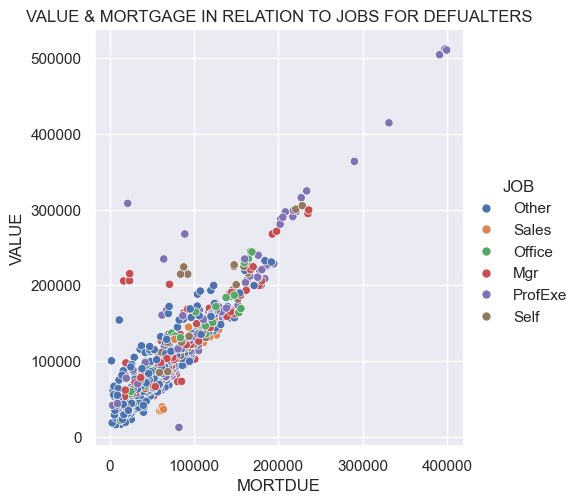

In [16]:
rel_value_mortdue = sns.relplot(default, x="MORTDUE", y="VALUE", hue="JOB")
plt.title("VALUE & MORTGAGE IN RELATION TO JOBS FOR DEFUALTERS")
rel_value_mortdue.savefig("./plots/rel_value_mortdue_def.png")

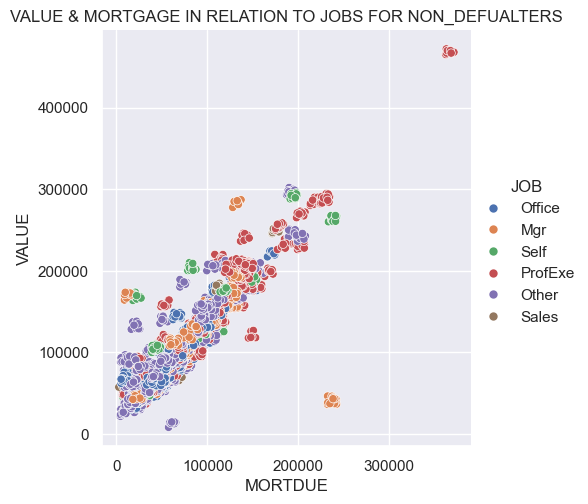

In [17]:
rel_value_mortdue = sns.relplot(non_default, x="MORTDUE", y="VALUE", hue="JOB")
plt.title("VALUE & MORTGAGE IN RELATION TO JOBS FOR NON_DEFUALTERS")
rel_value_mortdue.savefig("./plots/rel_value_mortdue_nondef.png")

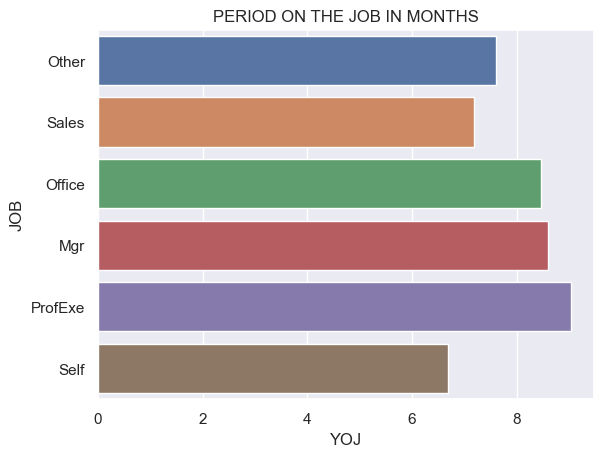

In [18]:
job_exp= sns.barplot(default, y="JOB", x="YOJ", hue="JOB", legend=False, errorbar=None)
plt.title("PERIOD ON THE JOB IN MONTHS")
job_exp_fig = job_exp.get_figure()
job_exp_fig.savefig("./plots/job_exp")

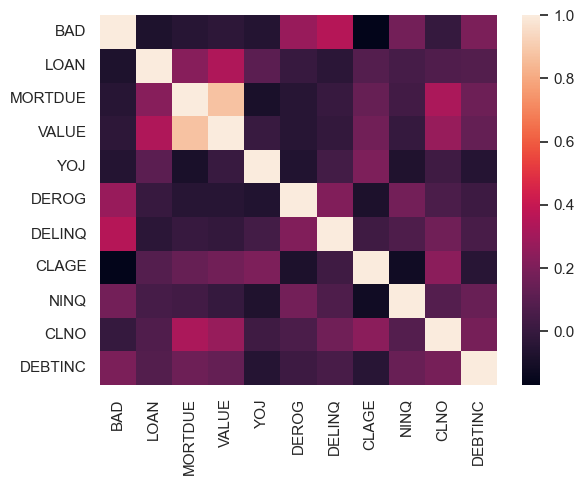

In [19]:
df_num_corr= df_num.corr()
corr_num= sns.heatmap(df_num_corr)
corr_num_fig = corr_num.get_figure()
corr_num_fig.savefig("./plots/corr_num.png")

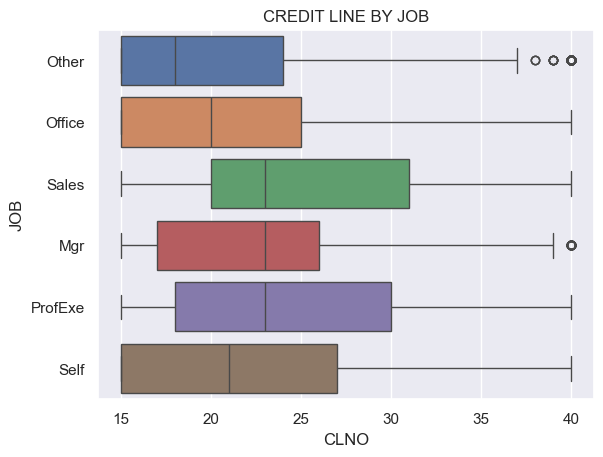

In [189]:
clno_job= sns.boxplot(df, x="CLNO", y="JOB", hue="JOB", legend=False)
clno_job_fig = clno_job.get_figure()
plt.title("CREDIT LINE BY JOB")
clno_job_fig.savefig("./plots/clno_job.png")

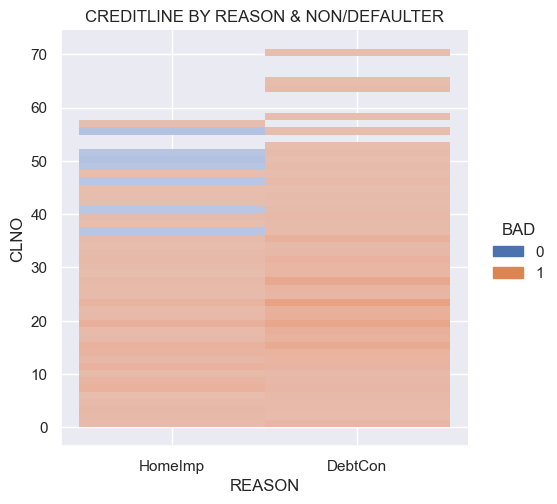

In [21]:
clno_rsn_bad= sns.displot(df, x="REASON", y="CLNO", hue="BAD")
plt.title("CREDITLINE BY REASON & NON/DEFAULTER")
# clno_rsn_bad_fig = clno_rsn_bad.get_figure()
clno_rsn_bad.savefig("./plots/clno_rsn_bad.png")

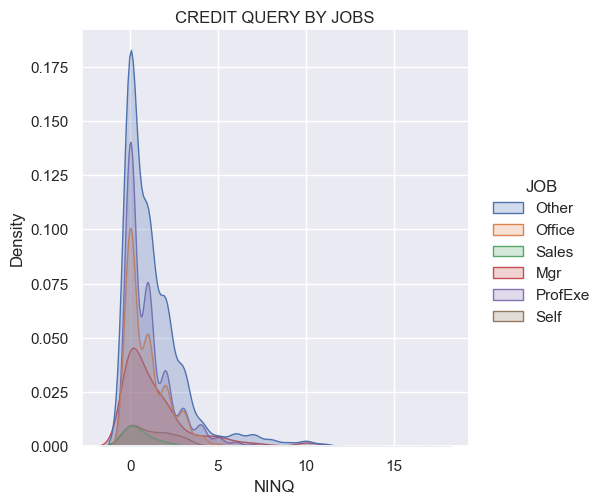

In [22]:
cred_job= sns.displot(df, x="NINQ", hue="JOB", kind="kde", fill="True")
plt.title("CREDIT QUERY BY JOBS")
# cred_job_fig= cred_job.get_figure()
cred_job.savefig("cred_job.png")

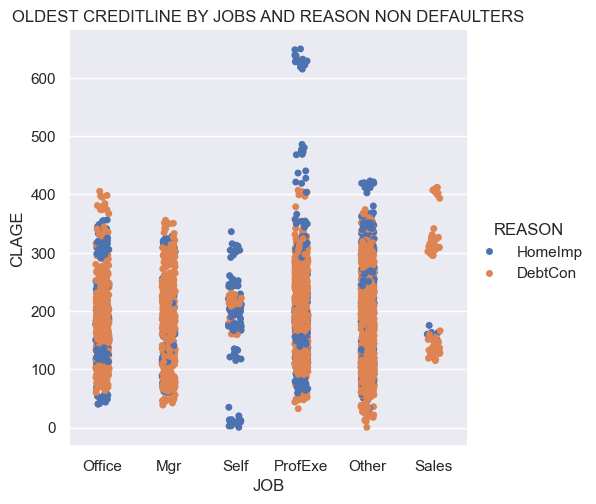

In [23]:
crdln_job_rsn= sns.catplot(non_default, x="JOB", y="CLAGE", hue="REASON")
plt.title("OLDEST CREDITLINE BY JOBS AND REASON NON DEFAULTERS")
crdln_job_rsn.savefig("crdln_job_rsn.png")

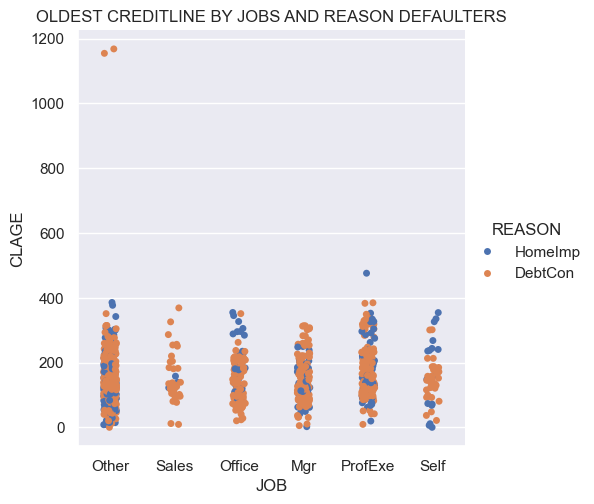

In [24]:

crdln_non= sns.catplot(default, x="JOB", y="CLAGE", hue="REASON")
plt.title("OLDEST CREDITLINE BY JOBS AND REASON DEFAULTERS")
crdln_non.savefig("crdln_non.png")

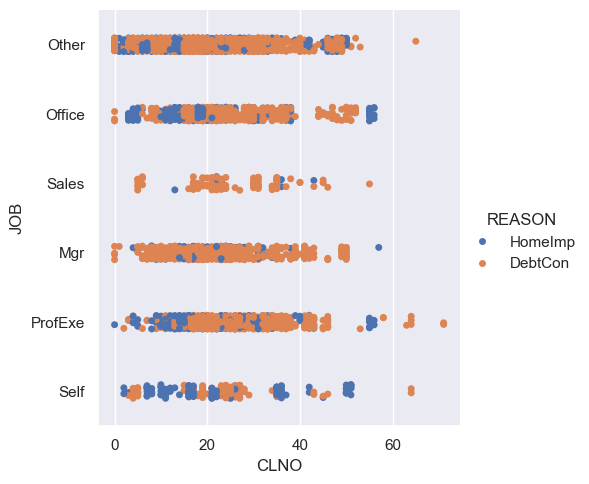

In [25]:
sns.catplot(df, x="CLNO", y="JOB", hue="REASON")

## *_FIX ISSUES WITH DATA SET_*

#### __HANDLING MISSING VALUES__

In [271]:
# Filling the missing values
mean_df= ['MORTDUE', 'VALUE', 'CLAGE', 'DEBTINC', 'DEROG', 'DELINQ', 'NINQ']
df[mean_df]= df[mean_df].fillna(df[mean_df].mean())

med_df= ['CLNO', 'YOJ']
df[med_df]= df[med_df].fillna(df[med_df].median())

cat_df= ['REASON', 'JOB']
df[cat_df]= df[cat_df].bfill()

df.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [272]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.5,0.00000,0.000000,94.366667,1.000000,9.0,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.0,0.00000,2.000000,121.833333,0.000000,14.0,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.0,0.00000,0.000000,149.466667,1.000000,10.0,33.779915
3,1,1500,73760.8172,101776.048741,HomeImp,Office,7.0,0.25457,0.449442,179.766275,1.186055,20.0,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.0,0.00000,0.000000,93.333333,0.000000,14.0,33.779915


<Axes: xlabel='JOB', ylabel='count'>

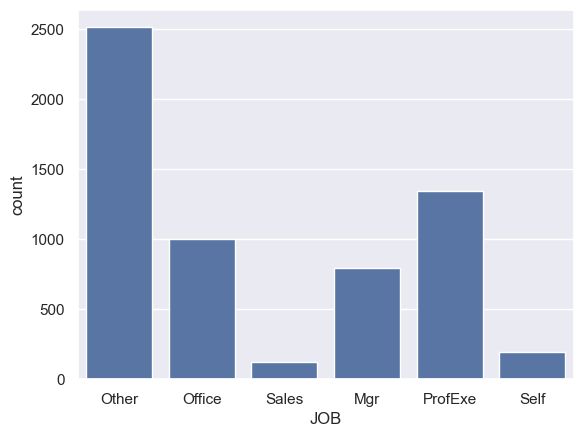

In [273]:
sns.countplot(df, x="JOB")

<Axes: xlabel='REASON', ylabel='count'>

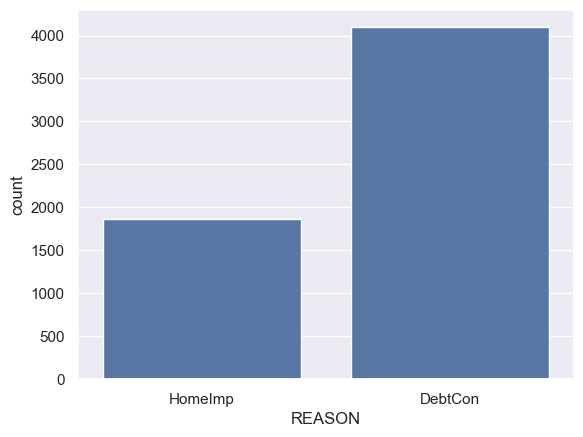

In [274]:
sns.countplot(df, x="REASON")

## *_SPLIT DATA SET INTO X (FEATURES) AND Y (LABEL)_*

In [275]:
x= df.drop(columns=["BAD"])
y= df.BAD

In [276]:
print(f"Shape: {y.value_counts()}")

Shape: BAD
0    4771
1    1189
Name: count, dtype: int64


In [277]:
x.head()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0000,39025.000000,HomeImp,Other,10.5,0.00000,0.000000,94.366667,1.000000,9.0,33.779915
1,1300,70053.0000,68400.000000,HomeImp,Other,7.0,0.00000,2.000000,121.833333,0.000000,14.0,33.779915
2,1500,13500.0000,16700.000000,HomeImp,Other,4.0,0.00000,0.000000,149.466667,1.000000,10.0,33.779915
3,1500,73760.8172,101776.048741,HomeImp,Office,7.0,0.25457,0.449442,179.766275,1.186055,20.0,33.779915
4,1700,97800.0000,112000.000000,HomeImp,Office,3.0,0.00000,0.000000,93.333333,0.000000,14.0,33.779915


In [278]:
x.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,18607.969799,73760.817200,101776.048741,8.756166,0.254570,0.449442,179.766275,1.186055,21.247819,33.779915
std,11207.480417,42481.395689,56843.931566,7.259424,0.794198,1.071002,83.563059,1.653046,9.951308,7.632713
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,16300.000000,69529.000000,90000.000000,7.000000,0.000000,0.000000,178.076005,1.000000,20.000000,33.779915
75%,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.449442,227.143058,2.000000,26.000000,37.949892
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


#### __ENCODING CATEGORICAL VARIABLES__

In [279]:
# encoding categorical classes in REASON and JOB columns
X= pd.get_dummies(x,columns=["REASON", "JOB"])
X.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.0000,39025.000000,10.5,0.00000,0.000000,94.366667,1.000000,9.0,33.779915,False,True,False,False,True,False,False,False
1,1300,70053.0000,68400.000000,7.0,0.00000,2.000000,121.833333,0.000000,14.0,33.779915,False,True,False,False,True,False,False,False
2,1500,13500.0000,16700.000000,4.0,0.00000,0.000000,149.466667,1.000000,10.0,33.779915,False,True,False,False,True,False,False,False
3,1500,73760.8172,101776.048741,7.0,0.25457,0.449442,179.766275,1.186055,20.0,33.779915,False,True,False,True,False,False,False,False
4,1700,97800.0000,112000.000000,3.0,0.00000,0.000000,93.333333,0.000000,14.0,33.779915,False,True,False,True,False,False,False,False


In [280]:
print(f"New Shape: {X.shape}")

New Shape: (5960, 18)


In [281]:
# Standardizing the Features using standarscaler (z = (x - u) / s)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas") # pandas df output
X_scaled= scaler.fit_transform(X_ros)
X_df= pd.DataFrame(X_scaled)


In [282]:
X_df.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.489590,-1.055531,-0.957409,-0.041564,-0.358483,-0.462626,-0.900538,-0.360780,-1.151371,-0.078028,-1.445346,1.445346,-0.40367,-0.41345,1.125393,-0.515609,-0.156107,-0.201131
1,-1.472094,-0.059036,-0.505597,-0.358965,-0.358483,0.896272,-0.570469,-0.579175,-0.680979,-0.078028,-1.445346,1.445346,-0.40367,-0.41345,1.125393,-0.515609,-0.156107,-0.201131
2,-1.454599,-1.334233,-1.300787,-0.631024,-0.358483,-0.462626,-0.238397,-0.360780,-1.057293,-0.078028,-1.445346,1.445346,-0.40367,-0.41345,1.125393,-0.515609,-0.156107,-0.201131
3,-1.454599,0.024571,0.007755,2.724360,-0.358483,-0.462626,0.125716,3.133540,-0.116509,-0.078028,-1.445346,1.445346,-0.40367,2.41867,-0.888579,-0.515609,-0.156107,-0.201131
4,-1.437104,0.566623,0.165008,-0.721710,-0.358483,-0.462626,-0.912956,-0.579175,-0.680979,-0.078028,-1.445346,1.445346,-0.40367,2.41867,-0.888579,-0.515609,-0.156107,-0.201131


In [283]:
# X_arr= X_ros.values
# y_arr= y_ros.values

In [284]:
# print(f"{X_arr}\n Shape: {X_arr.shape}")

In [285]:
# print(f"{y_arr}\n Shape: {y_arr.shape}")

## *_BUILDING MODEL_*

#### __SPLITTING X AND Y INTO TEST AND TRAIN DATA__

In [286]:
# Split data into training and test data
x_train, x_test, y_train, y_test = train_test_split(X_df, y_ros, test_size=0.2, random_state=42)

In [287]:
knn= KNeighborsClassifier(n_neighbors=3, weights="uniform")
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [288]:
knn.classes_

array([0, 1])

In [289]:
print(f"Number of Featurs: {knn.n_features_in_}\nNames of Features: {knn.feature_names_in_}")

Number of Featurs: 18
Names of Features: ['LOAN' 'MORTDUE' 'VALUE' 'YOJ' 'DEROG' 'DELINQ' 'CLAGE' 'NINQ' 'CLNO'
 'DEBTINC' 'REASON_DebtCon' 'REASON_HomeImp' 'JOB_Mgr' 'JOB_Office'
 'JOB_Other' 'JOB_ProfExe' 'JOB_Sales' 'JOB_Self']


In [290]:
# Model Predictions test
y_pred = knn.predict(x_test)

In [291]:
# Model Evaluation
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.96      0.98      0.97       946
           1       0.98      0.96      0.97       963

    accuracy                           0.97      1909
   macro avg       0.97      0.97      0.97      1909
weighted avg       0.97      0.97      0.97      1909



In [292]:
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[927  19]
 [ 34 929]]


<Axes: >

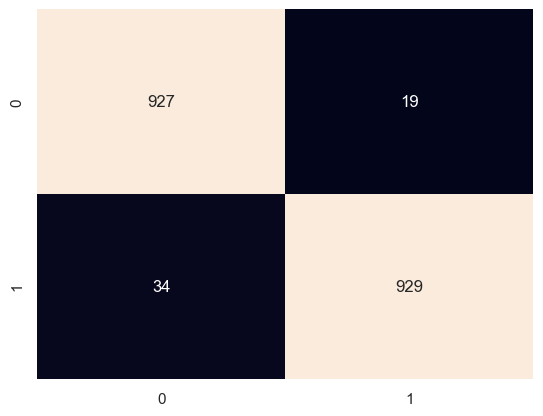

In [293]:
sns.heatmap(con_mat, annot=True, fmt=".0f", cbar=False, )